<a href="https://colab.research.google.com/github/elnaghy/data_manpulation/blob/main/data_manpulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib

In [2]:
def calculate_dominant_year(row, df_vintage):
  overlapping_ranges = df_vintage[(df_vintage['nmStartMeter'] <= row['nmEndmeter']) & (df_vintage['nmEndMeter'] >= row['nmStartmeter'])].copy()
  if overlapping_ranges.empty:
    return None

  #overlapping_ranges['nmStartmeter_row'] = row['nmStartmeter']
  overlapping_ranges['overlap_start'] = overlapping_ranges[['nmStartMeter']].clip(lower=row['nmStartmeter'])
  overlapping_ranges['overlap_end'] = overlapping_ranges[['nmEndMeter']].clip(upper=row['nmEndmeter'])
  overlapping_ranges['overlap_length'] = overlapping_ranges['overlap_end'] - overlapping_ranges['overlap_start']

  overlapping_ranges = overlapping_ranges[overlapping_ranges['overlap_length'] > 0]

  weighted_ranges = overlapping_ranges.groupby('year group')['overlap_length'].sum()

  dominant_category = weighted_ranges.idxmax()

  return dominant_category

In [3]:
from google.colab import files
uploaded = files.upload()

Saving output.xlsx to output.xlsx


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "output.xlsx" with length 27980 bytes


In [6]:
import pandas as pd

In [ ]:
pop_data = uploaded['population_data.xlsx']
vintage_data = uploaded['NPS26 Trafalgar Vintage.xlsx']

In [ ]:
df_pop = pd.read_excel(pop_data)
df_vintage = pd.read_excel(vintage_data)

<ipython-input-6-f31bfe72b350>:1: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df_pop = pd.read_excel(pop_data)
<ipython-input-6-f31bfe72b350>:2: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df_vintage = pd.read_excel(vintage_data)


In [ ]:
df_pop['year group'] = df_pop.apply(calculate_dominant_year, axis=1, df_vintage=df_vintage)

In [ ]:
df_pop['year group'].tail()

,year group
221,>1990
222,<1970
223,<1970
224,>1990
225,>1990


In [ ]:
df_pop

,idSegment,Pipeline Index,Pipeline Name,nmStartmeter,nmEndmeter,Column6,Column7,ID.1,ID.2,Column9,ROSEN FEATURE COUNT,New p (pp/ha),Original p (pp/ha),Type - Short UID,year group
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,0.000000,NaN,NaN,None
1,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,1288.02,2000.0,1.0,2.0,1.0,2.0,1.000000,1,0.695447,0.0,Reliability - 1288m to 2000m - 1040.TRCP.26-ST...,<1970
2,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,2000.00,3000.0,2.0,3.0,2.0,3.0,2.500000,1,0.060180,0.0,Reliability - 2000m to 3000m - 1040.TRCP.26-ST...,<1970
3,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,3000.00,4000.0,3.0,4.0,3.0,4.0,3.500000,2,0.060180,0.0,Reliability - 3000m to 4000m - 1040.TRCP.26-ST...,<1970
4,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,4000.00,5000.0,4.0,5.0,4.0,5.0,4.500000,0,0.120360,0.0,Reliability - 4000m to 5000m - 1040.TRCP.26-ST...,<1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,221000.00,222000.0,221.0,222.0,221.0,222.0,221.500000,1,5.738220,0.0,Reliability - 221000m to 222000m - 1040.TRCP.2...,>1990
222,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,222000.00,223000.0,222.0,223.0,222.0,223.0,222.500000,2,0.156222,0.0,Reliability - 222000m to 223000m - 1040.TRCP.2...,<1970
223,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,223000.00,224000.0,223.0,224.0,223.0,224.0,223.500000,0,0.078111,0.0,Reliability - 223000m to 224000m - 1040.TRCP.2...,<1970
224,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,224000.00,225000.0,224.0,225.0,224.0,225.0,224.500000,3,0.301785,0.0,Reliability - 224000m to 225000m - 1040.TRCP.2...,>1990


In [ ]:
df_pop.to_excel('output.xlsx')

In [ ]:
from google.colab import files
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
pop_data = uploaded['output.xlsx']
df_pop = pd.read_excel(pop_data)
df_pop.head()

<ipython-input-7-5d288bf31f53>:2: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df_pop = pd.read_excel(pop_data)


,Unnamed: 0,idSegment,Pipeline Index,Pipeline Name,nmStartmeter,nmEndmeter,Column6,Column7,ID.1,ID.2,Column9,ROSEN FEATURE COUNT,New p (pp/ha),Original p (pp/ha),Type - Short UID,year group
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.000000,NaN,NaN,NaN
1,1,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,1288.02,2000.0,1.0,2.0,1.0,2.0,1.0,1,0.695447,0.0,Reliability - 1288m to 2000m - 1040.TRCP.26-ST...,<1970
2,2,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,2000.00,3000.0,2.0,3.0,2.0,3.0,2.5,1,0.060180,0.0,Reliability - 2000m to 3000m - 1040.TRCP.26-ST...,<1970
3,3,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,3000.00,4000.0,3.0,4.0,3.0,4.0,3.5,2,0.060180,0.0,Reliability - 3000m to 4000m - 1040.TRCP.26-ST...,<1970
4,4,191.0,1040.TRCP.26-STO,NPS 26 Trafalgar - Cuthbert to Parkway East,4000.00,5000.0,4.0,5.0,4.0,5.0,4.5,0,0.120360,0.0,Reliability - 4000m to 5000m - 1040.TRCP.26-ST...,<1970


In [9]:
import matplotlib.pyplot as plt
import numpy as np

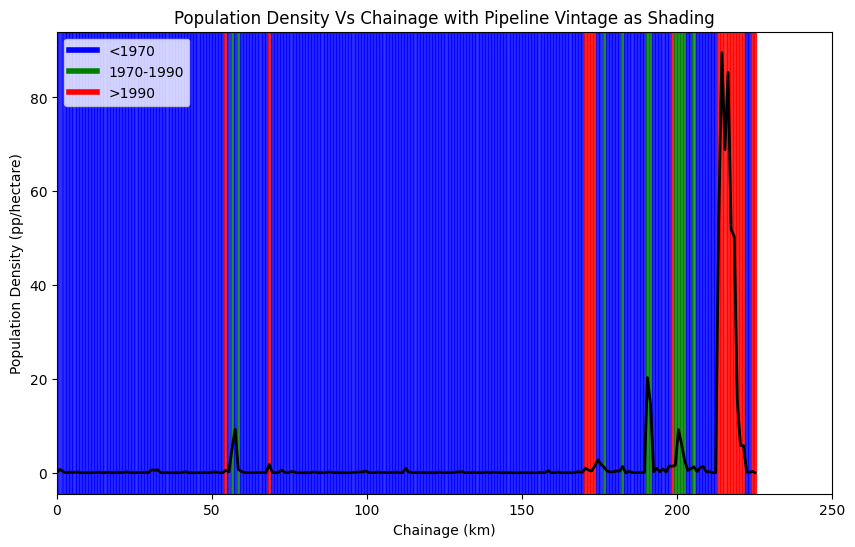

In [10]:
category_colors = {
    '<1970': 'blue',
    '1970-1990': 'green',
    '>1990': 'red'
}

fig, ax = plt.subplots(figsize=(10, 6))

for index, row in df_pop.iterrows():
  ax.axvspan(row['Column9'] - 0.5, row['Column9'] + 0.5, color=category_colors.get(row['year group'], 'white'), alpha=0.8)

ax.plot(df_pop['Column9'], df_pop['New p (pp/ha)'], label='Population Density', color='black', linestyle='-', linewidth=2)
ax.set_xlabel('Chainage (km)')
ax.set_ylabel('Population Density (pp/hectare)')
ax.set_title('Population Density Vs Chainage with Pipeline Vintage as Shading')
ax.set_xlim(0,250)


handles = [plt.Line2D([0], [0], color = category_colors['<1970'], lw=4, label='<1970'),
           plt.Line2D([0], [0], color = category_colors['1970-1990'], lw=4, label='1970-1990'),
           plt.Line2D([0], [0], color = category_colors['>1990'], lw=4, label='>1990')
          ]

ax.legend(handles=handles, loc='upper left')

plt.show()

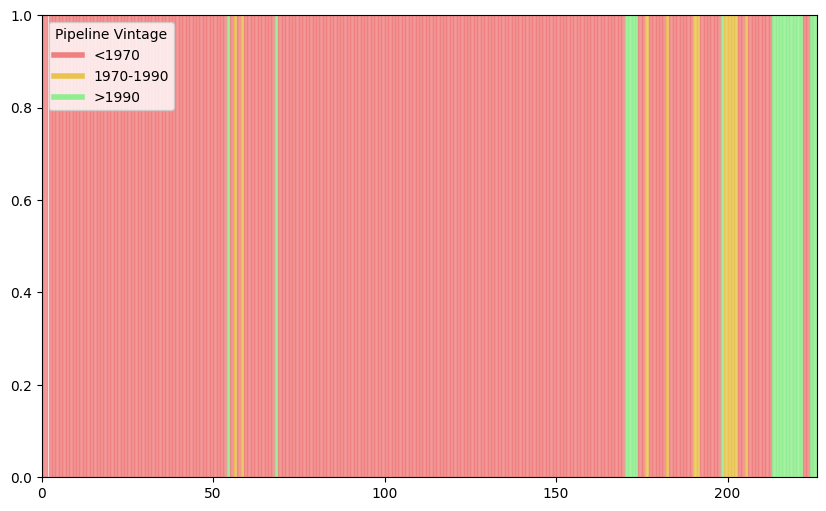

In [104]:
category_colors = {
    '<1970': 'lightcoral',
    '1970-1990': '#e9c34e',
    '>1990': 'lightgreen'
}

fig, ax = plt.subplots(figsize=(10, 6))

for index, row in df_pop.iterrows():
  ax.axvspan(row['Column9'] - 0.5, row['Column9'] + 0.5, color=category_colors.get(row['year group'], 'white'), alpha=0.8)

# ax.plot(df_pop['Column9'], df_pop['New p (pp/ha)'], label='Population Density', color='black', linestyle='-', linewidth=2)
# ax.set_xlabel('Chainage (km)')
# ax.set_ylabel('Population Density (pp/hectare)')
# ax.set_title('Population Density Vs Chainage with Pipeline Vintage as Shading')
ax.set_xlim(0,226)

# ax2= ax.twinx()
# ax2.bar(df_pop['Column9'], df_pop['ROSEN FEATURE COUNT'], color='blue', alpha=0.5,width=1, label='ROSEN FEATURE COUNT')
# ax2.set_ylabel('ROSEN FEATURE COUNT')
# ax2.tick_params(axis='y', labelcolor='black')


handles = [plt.Line2D([0], [0], color = category_colors['<1970'], lw=4, label='<1970'),
           plt.Line2D([0], [0], color = category_colors['1970-1990'], lw=4, label='1970-1990'),
           plt.Line2D([0], [0], color = category_colors['>1990'], lw=4, label='>1990')
          ]

ax.legend(handles=handles, loc='upper left', title='Pipeline Vintage')
# plt.tight_layout()
plt.show()